<a href="https://colab.research.google.com/github/MOHAN-DATTA-24/Machine_Learning_G/blob/main/dl4nlp_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions to run:
1. Install all the libraries given in the imports.
2. Download the Stack Overflow dataset (2016-2020) from here (https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate).
3. Open in a console that supports .ipynb or python notebooks.
4. Run the program on the console and wait for the program to finish.

In [2]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 886.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=dc02c3c141808ab8fae8d1cfc878056c9322dfb8a66ff4140d424ee7c37b3a30
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [3]:
!pip install -U scikit-learn

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from plotly import graph_objs as go
#from sklearn.metrics import plot_confusion_matrix
import random
import numpy as np
import seaborn as sns

In [2]:
def visualize_confusion_matrix(accuracy, labels, val_pred_labels, val_true_labels):
    '''
    Plots the confusion matrix for given data.
    '''
    confusion_matrix = np.zeros((3, 3), dtype=np.int16)
    for pred, true in zip(val_pred_labels, val_true_labels):
        confusion_matrix[pred, true] += 1
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1,keepdims=1)

    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(confusion_matrix, annot=True, square=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_title(f'Confusion Matrix (Accuracy = {accuracy})', fontsize=50)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)
    ax.set_xlabel("True Label", fontsize=25)
    ax.set_ylabel("Predicted Label", fontsize=25)
    plt.show()

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('valid.csv')
data = pd.concat((train_data, test_data))
print(f'The size of training dataset is: {len(train_data)} samples')
print(f'The size of testing dataset is: {len(test_data)} samples')
print(f'The combined size of the dataset is: {len(data)} samples')

The size of training dataset is: 45000 samples
The size of testing dataset is: 15000 samples
The combined size of the dataset is: 60000 samples


In [6]:
data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


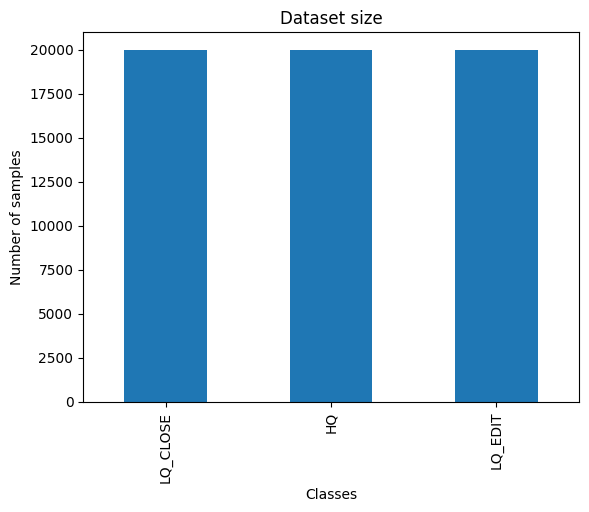

In [7]:
data.Y.value_counts().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Dataset size')
plt.show()

In [8]:
data['Text']=data.Body.apply(lambda x: BeautifulSoup(x, 'html.parser').text)
data.head()

<ipython-input-8-d48810a1bb05>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Text']=data.Body.apply(lambda x: BeautifulSoup(x, 'html.parser').text)
/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)
/usr/lib/python3.10/html/parser.py:342: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML

,Id,Title,Body,Tags,CreationDate,Y,Text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...


In [9]:
HQ = data[data['Y']=='HQ']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
LQ_EDIT = data[data['Y']=='LQ_EDIT']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
LQ_CLOSE = data[data['Y']=='LQ_CLOSE']['Text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)

fig = go.Figure()
fig.add_trace(go.Histogram(x=HQ, histfunc='avg', name="HQ", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=LQ_EDIT, histfunc='avg', name="LQ_EDIT", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=LQ_CLOSE, histfunc='avg', name="LQ_CLOSE", opacity=0.6, histnorm='probability density'))

fig.update_layout(
    title_text='Question word count frequency',
    xaxis_title_text='Word count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.1,
    barmode='overlay'
)
fig.show()

In [10]:
SEQ_LEN = 360
VOCAB_SIZE = 100000
EPOCHS = 25
BATCH_SIZE = 32
OOV_TOKEN = '<UNK>'

In [11]:
train, remain = train_test_split(data, test_size=0.2, random_state=0)
validation, test = train_test_split(remain, test_size=0.5, random_state=0)

print(f'The size of training dataset is: {len(train)} samples')
print(f'The size of validation dataset is: {len(validation)} samples')
print(f'The size of test dataset is: {len(test)} samples')

The size of training dataset is: 48000 samples
The size of validation dataset is: 6000 samples
The size of test dataset is: 6000 samples


In [12]:
encoder = LabelEncoder()
encoder.fit(data.Y.values)

encoded_train_Y = encoder.transform(train.Y.values)
encoded_valid_Y = encoder.transform(validation.Y.values)
encoded_test_Y = encoder.transform(test.Y.values)

train_X = train.Text.values
valid_X = validation.Text.values
test_X = test.Text.values

train_Y = to_categorical(encoded_train_Y)
valid_Y = to_categorical(encoded_valid_Y)
test_Y = to_categorical(encoded_test_Y)

In [13]:
tokens = preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokens.fit_on_texts(list(train_X))

train_X = tokens.texts_to_sequences(train_X)
valid_X = tokens.texts_to_sequences(valid_X)
test_X = tokens.texts_to_sequences(test_X)

print(np.quantile([len(x) for x in train_X], 0.95))

train_X = preprocessing.sequence.pad_sequences(train_X, maxlen=SEQ_LEN, padding='post', truncating='post')
valid_X = preprocessing.sequence.pad_sequences(valid_X, maxlen=SEQ_LEN, padding='post', truncating='post')
test_X = preprocessing.sequence.pad_sequences(test_X, maxlen=SEQ_LEN, padding='post', truncating='post')

360.0


In [14]:
inputs = Input(shape=(None,), dtype="int32")

x = layers.Embedding(VOCAB_SIZE, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'],)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         12800000  
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 12998019 (49.58 MB)
Trainable params: 12998019 

In [15]:
my_callbacks = [callbacks.ModelCheckpoint('lstm.h5', monitor='val_loss', save_best_only=True, verbose=2),
                callbacks.EarlyStopping(monitor='val_loss',  patience=5, verbose=2),
                callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2)]

lstm = model.fit(train_X,
                train_Y,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(valid_X, valid_Y),
                callbacks = my_callbacks,
                verbose=1)

Epoch 1/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.3635 - accuracy: 0.7490
Epoch 1: val_loss improved from inf to 0.25472, saving model to lstm.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1500/1500 [==============================] - 136s 86ms/step - loss: 0.3633 - accuracy: 0.7491 - val_loss: 0.2547 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 2/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.8757
Epoch 2: val_loss improved from 0.25472 to 0.23923, saving model to lstm.h5
1500/1500 [==============================] - 84s 56ms/step - loss: 0.2214 - accuracy: 0.8757 - val_loss: 0.2392 - val_accuracy: 0.8608 - lr: 0.0010
Epoch 3/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.1809 - accuracy: 0.9028
Epoch 3: val_loss did not improve from 0.23923
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1809 - accuracy: 0.9028 - val_loss: 0.2406 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 4/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9231
Epoch 4: val_loss did not improve from 0.23923

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1500/1500 [===

In [16]:
loss, accuracy = model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)
pred_Y = np.argmax(pred_Y, axis=1)

true_Y = np.argmax(test_Y, axis=1)

CLASSES = list(encoder.classes_)

from sklearn.metrics import classification_report
print(classification_report(true_Y, pred_Y, target_names=CLASSES))

188/188 [==============================] - 5s 18ms/step
              precision    recall  f1-score   support

          HQ       0.82      0.82      0.82      1981
    LQ_CLOSE       0.79      0.79      0.79      1996
     LQ_EDIT       0.96      0.94      0.95      2023

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



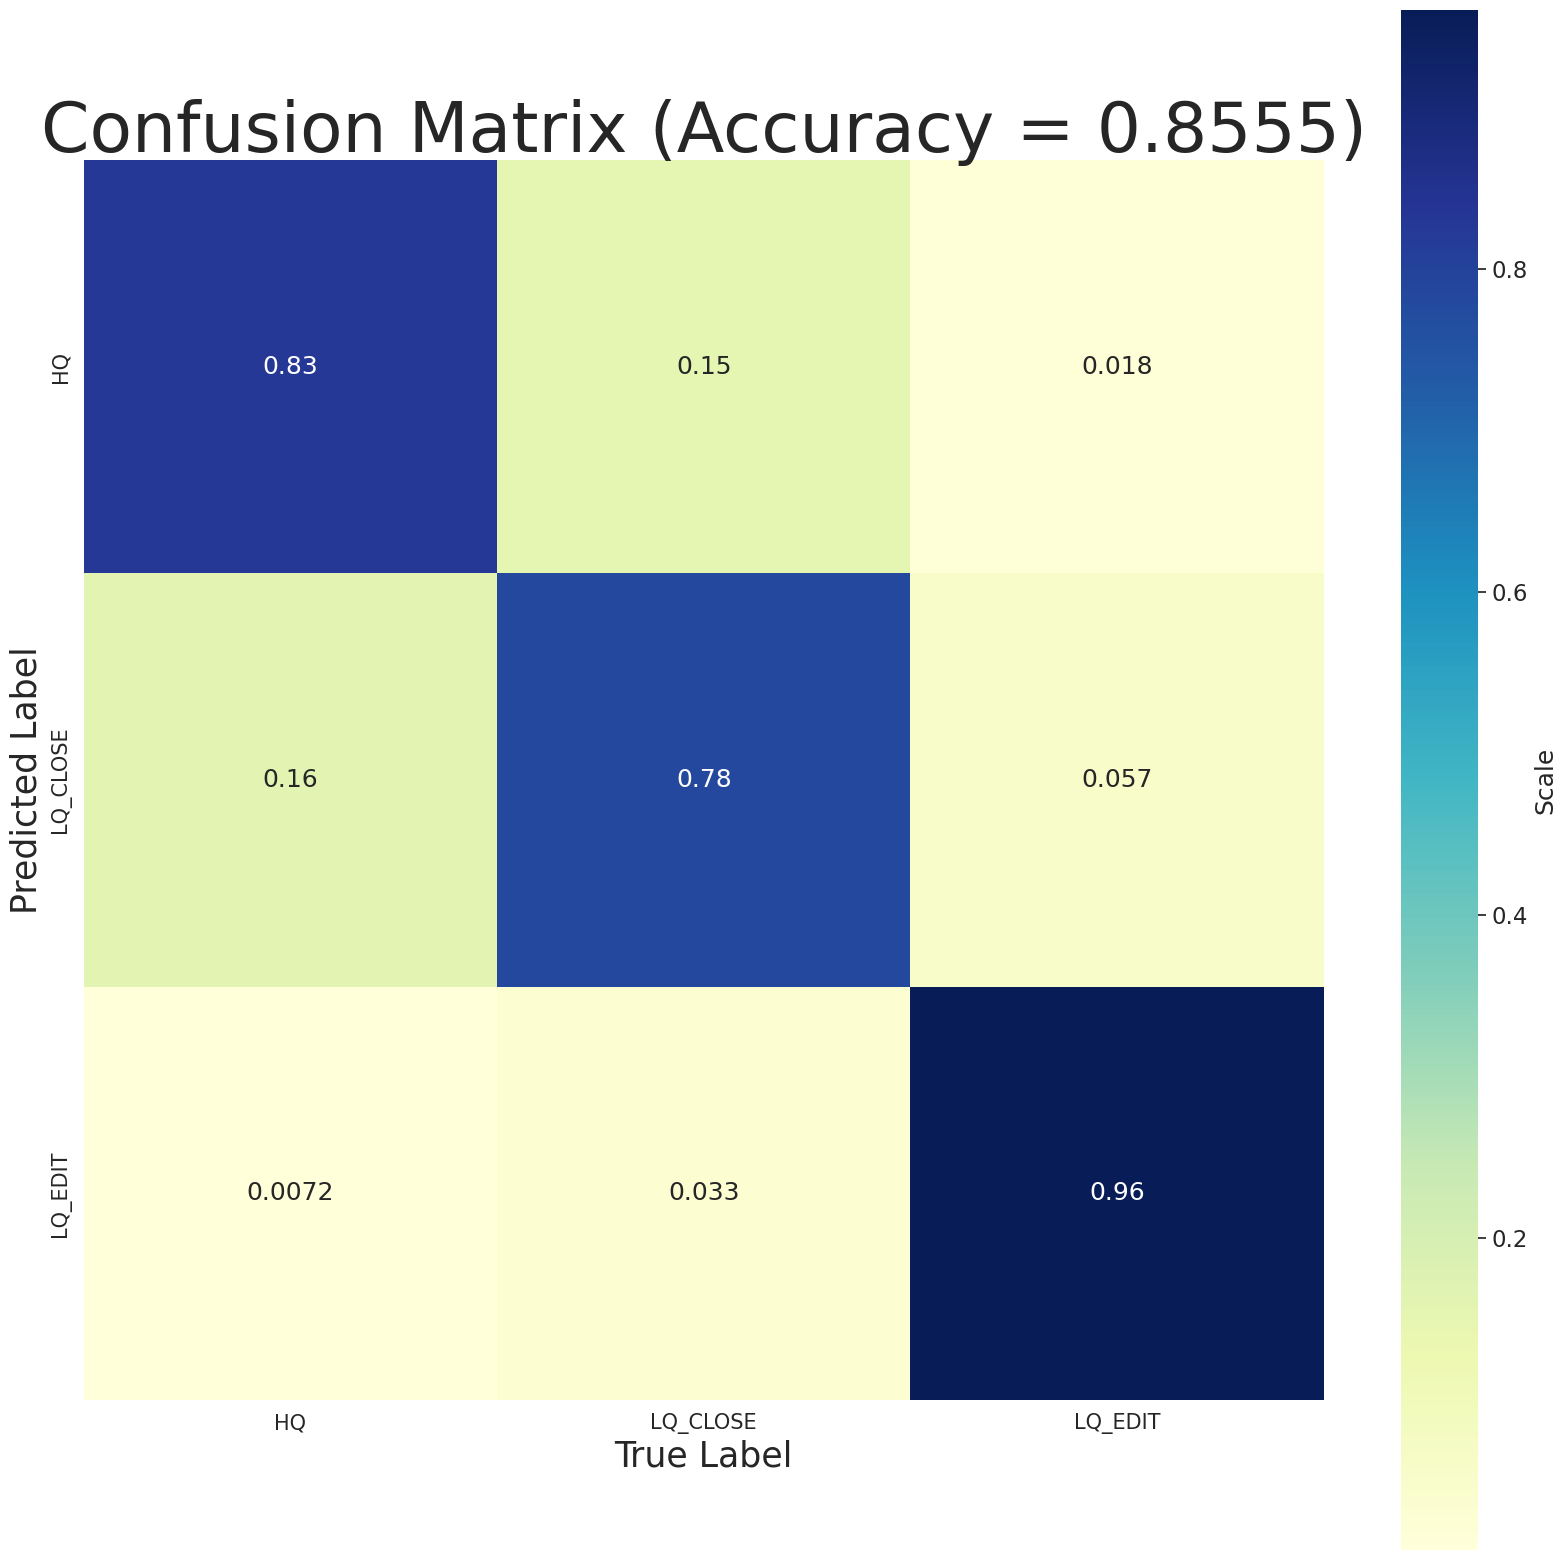

In [28]:
visualize_confusion_matrix(round(accuracy, 4), CLASSES, pred_Y, true_Y)

In [24]:
inputs = Input(shape=(SEQ_LEN,), dtype="int32")

x = layers.Embedding(VOCAB_SIZE, 128)(inputs)
x = layers.Conv1D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling1D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'],)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 360)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 360, 128)          12800000  
                                                                 
 conv1d (Conv1D)             (None, 360, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1  (None, 180, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               737408    
                                                           

In [25]:
my_callbacks = [callbacks.ModelCheckpoint('cnn.h5', monitor='val_loss', save_best_only=True, verbose=2),
                callbacks.EarlyStopping(monitor='val_loss',  patience=5, verbose=2),
                callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2)]

cnn = model.fit(train_X,
                train_Y,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(valid_X, valid_Y),
                callbacks = my_callbacks,
                verbose=1)

Epoch 1/25
1497/1500 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.8373
Epoch 1: val_loss improved from inf to 0.22890, saving model to cnn.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1500/1500 [==============================] - 68s 41ms/step - loss: 0.2576 - accuracy: 0.8374 - val_loss: 0.2289 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 2/25
1498/1500 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9140
Epoch 2: val_loss did not improve from 0.22890
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1491 - accuracy: 0.9140 - val_loss: 0.2490 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 3/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.0628 - accuracy: 0.9670
Epoch 3: val_loss did not improve from 0.22890

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0628 - accuracy: 0.9669 - val_loss: 0.3773 - val_accuracy: 0.8447 - lr: 0.0010
Epoch 4/25
1500/1500 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9941
Epoch 4: val_loss did not improve from 0.22890
1500/1500 [==============================] - 

In [26]:
loss, accuracy = model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)
pred_Y = np.argmax(pred_Y, axis=1)

true_Y = np.argmax(test_Y, axis=1)

CLASSES = list(encoder.classes_)
print(classification_report(true_Y, pred_Y, target_names=CLASSES))

188/188 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          HQ       0.83      0.83      0.83      1981
    LQ_CLOSE       0.78      0.82      0.80      1996
     LQ_EDIT       0.96      0.92      0.94      2023

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



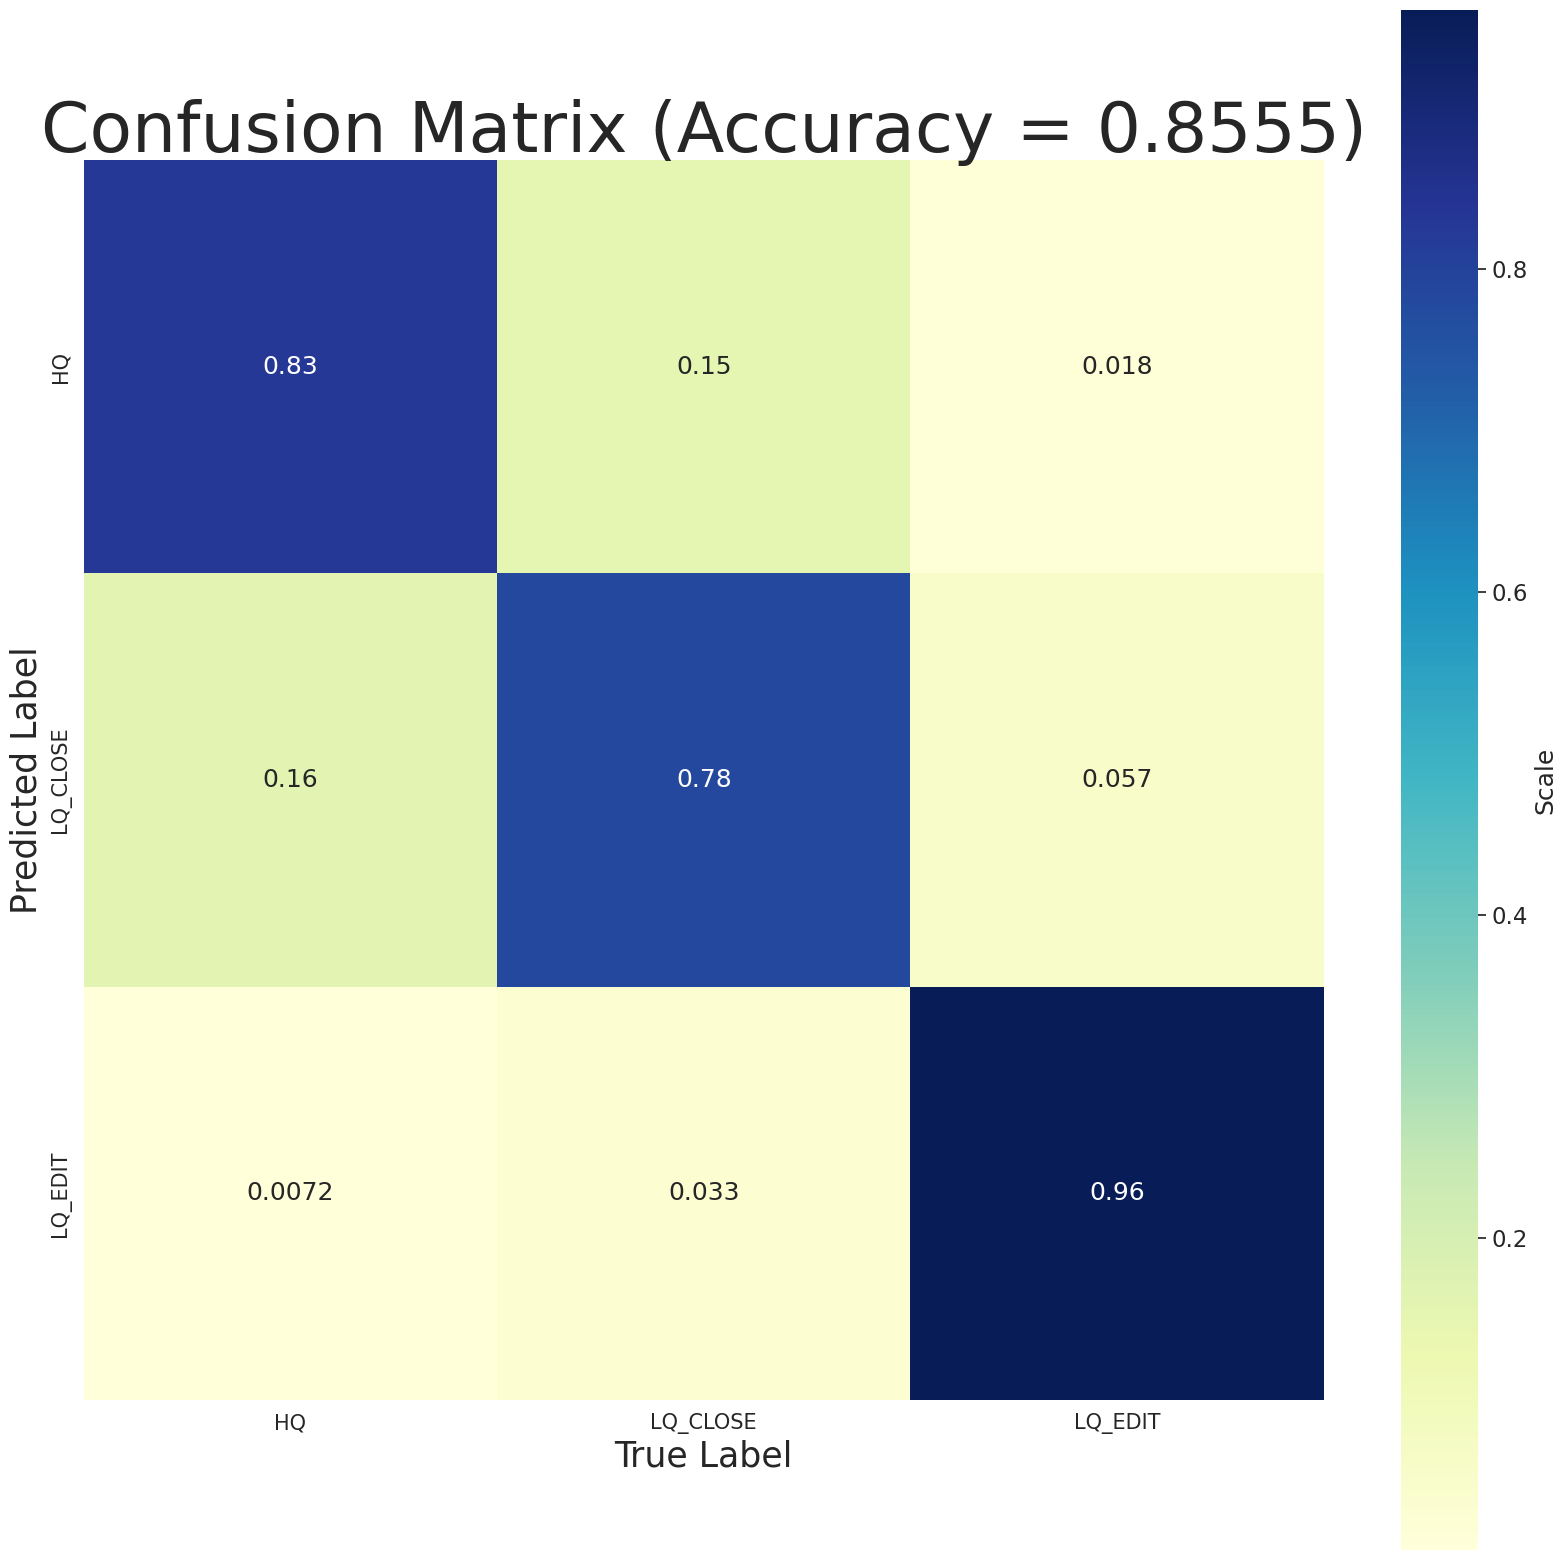

In [27]:
visualize_confusion_matrix(round(accuracy, 4), CLASSES, pred_Y, true_Y)

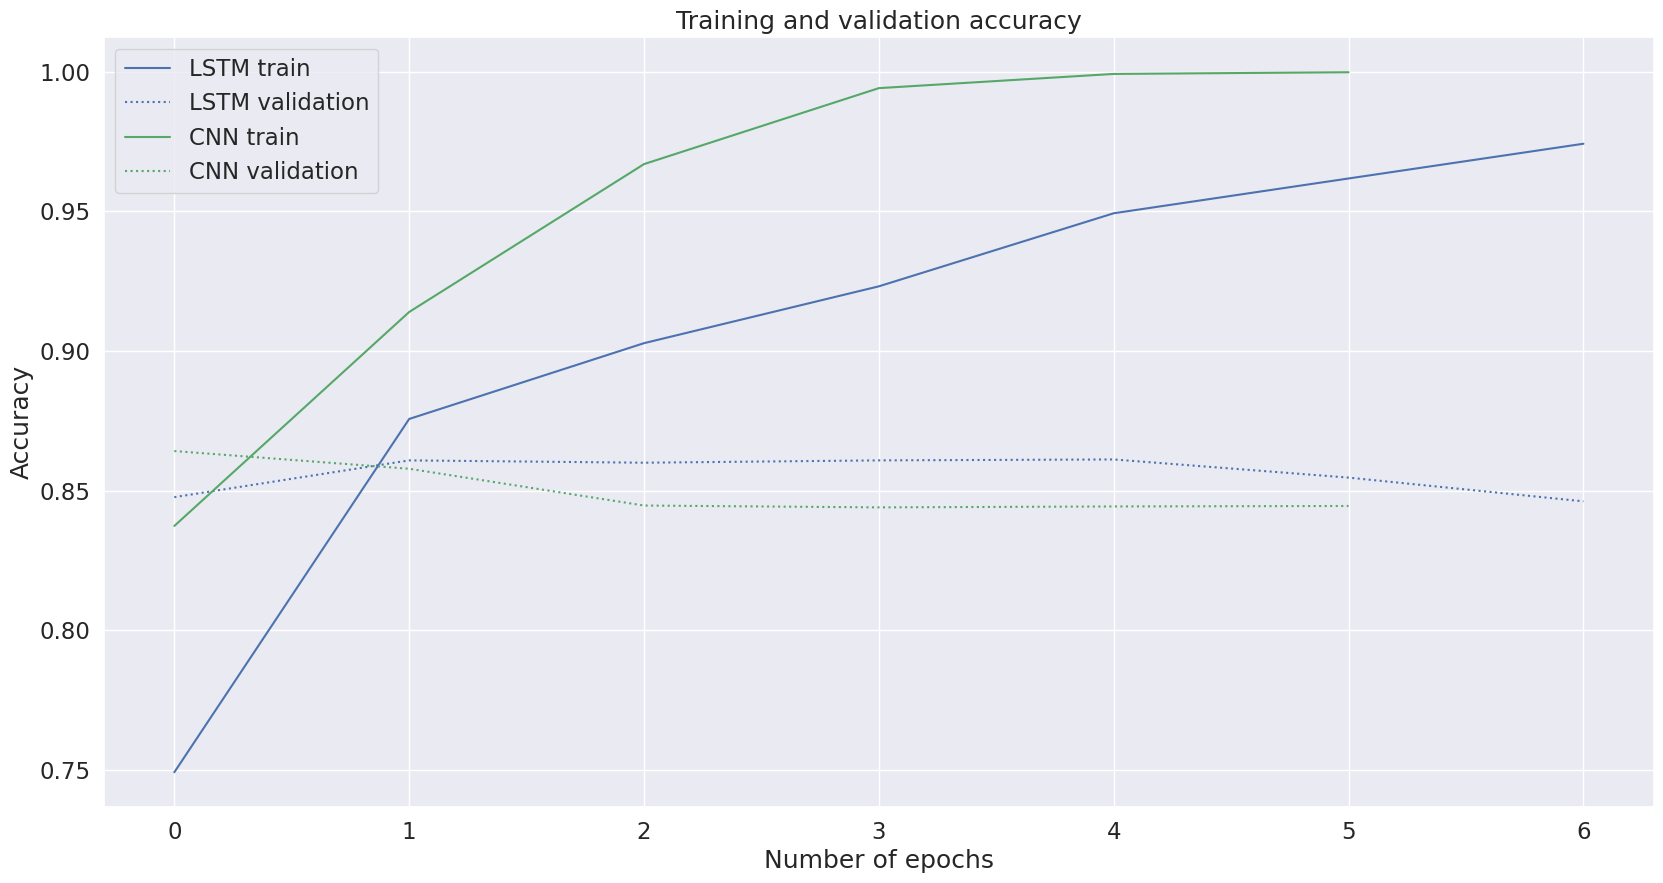

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(lstm.history['accuracy'], label='LSTM train', linestyle='-', color='b')
plt.plot(lstm.history['val_accuracy'], label='LSTM validation', linestyle=':', color='b')
plt.plot(cnn.history['accuracy'], label='CNN train', linestyle='-', color='g')
plt.plot(cnn.history['val_accuracy'], label='CNN validation', linestyle=':', color='g')
plt.title('Training and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

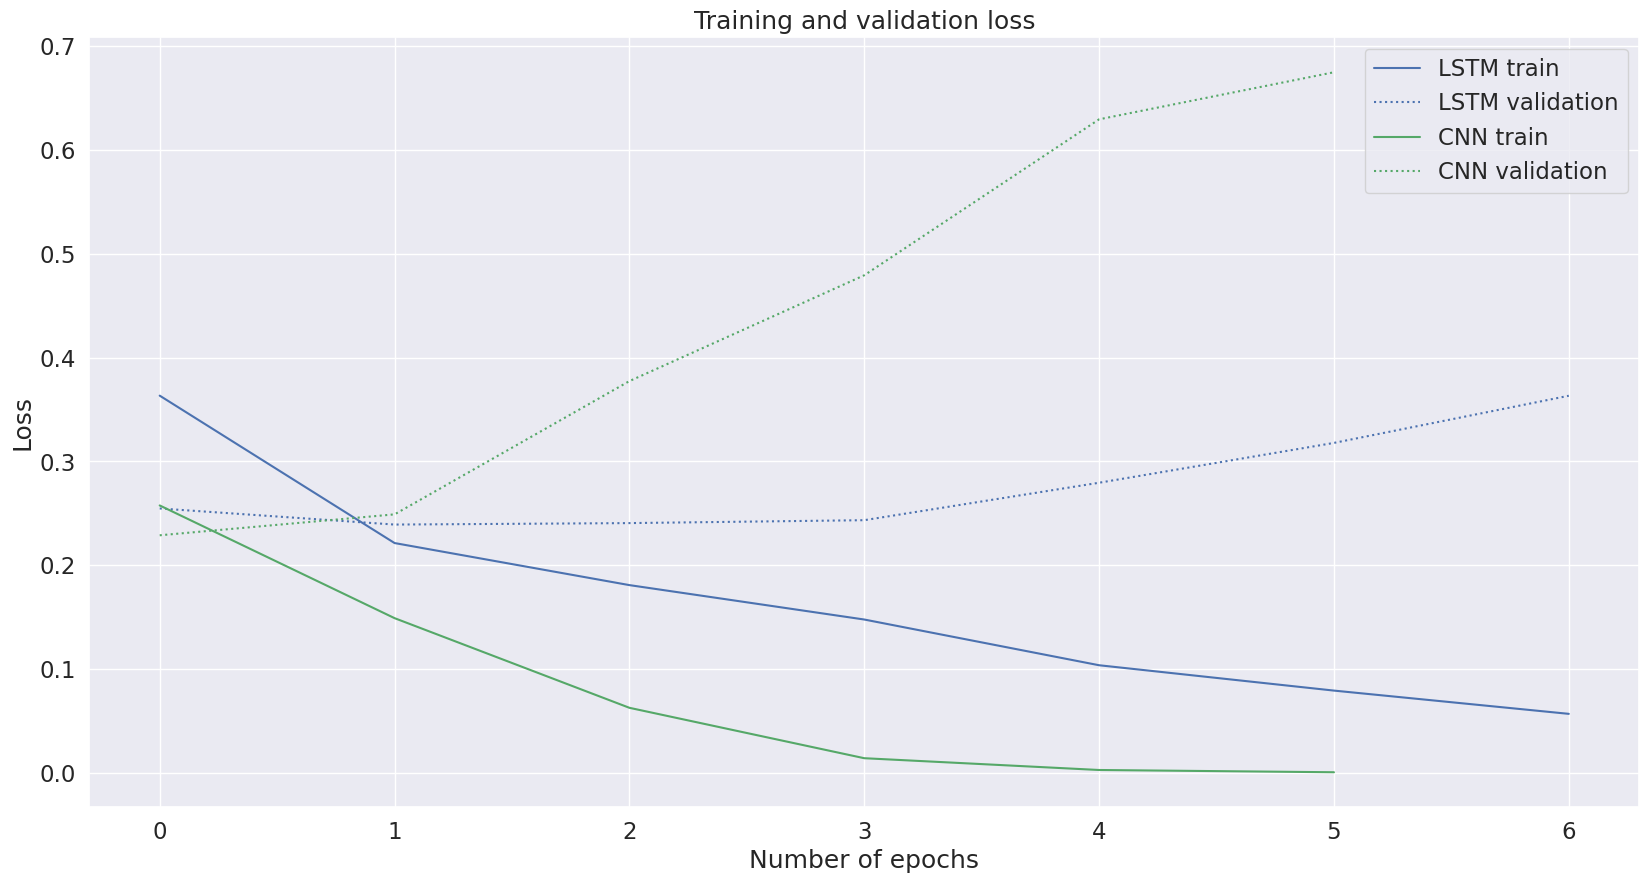

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(lstm.history['loss'], label='LSTM train', linestyle='-', color='b')
plt.plot(lstm.history['val_loss'], label='LSTM validation', linestyle=':', color='b')
plt.plot(cnn.history['loss'], label='CNN train', linestyle='-', color='g')
plt.plot(cnn.history['val_loss'], label='CNN validation', linestyle=':', color='g')
plt.title('Training and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()